In [1]:
import sys
REL_DIR  = "../../../.."
sys.path.append(REL_DIR)

# Specifying Node Positions and Plotting via NetworkX

We specify node positions and used them to plot a network with NetworkX.

## 1. Toy example

While it is usually sufficient to pass edge data to setup a graph, one may specify further attributes, such as their coordinates in a 2D plane for plotting. This can be simply done by further passing node data to the network constructor:

In [2]:
import paminco
import numpy as np

edge_data = np.array([
    ["A", "B"],
    ["A", "C"],
    ["B", "C"],
    ["B", "D"],
    ["C", "D"],
])
labels = ["A", "B", "C", "D"]
xy = [(0, 0), (0, 3), (3, 3), (3, 0)]
node_data = (labels, xy)
graph = paminco.Network(edge_data, node_data)

We can verify if the node coordinates are correctly specified:

In [3]:
graph.nodes.to_df()

,label,zone,x,y
0,A,False,0.0,0.0
1,B,False,0.0,3.0
2,C,False,3.0,3.0
3,D,False,3.0,0.0


We can use the Python package [NetworkX](https://networkx.org/) for basic plotting:

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

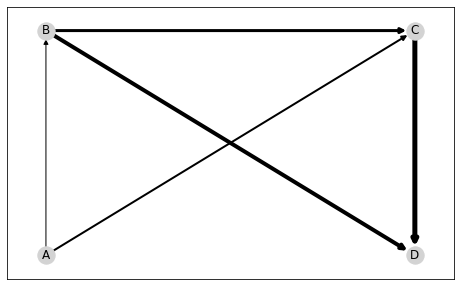

In [5]:

import matplotlib.pyplot as plt
import networkx as nx

# Retrive position dict (label -> (x, y))
pos = graph.get_node_pos()

# Set fictious flow and get as edgelist
flow = np.array([1, 2, 3, 4, 5])  # E.g., flow on A -> B = 1, ..., C -> D = 5
flow = graph.get_flow_df(flow)

# Make nx.DiGraph from edgelist
G = nx.from_pandas_edgelist(
    flow,
    edge_attr=["flow"],
    create_using=nx.DiGraph(),
)

# Plot, nodes, edges and labels
plt.figure(figsize=(8, 5))
nx.draw_networkx_nodes(G, pos, node_color="lightgrey")
nx.draw_networkx_edges(
    G,
    pos, 
    width=flow.flow,
)
_ = nx.draw_networkx_labels(G, pos)

## 2. SiouxFalls

First, we load the SiouxFalls network with its specified node positions:

In [20]:
sioux = paminco.load_sioux()
sioux.nodes.to_df().head()

,label,zone,x,y
0,1,False,-96.770420,43.612828
1,2,False,-96.711251,43.605813
2,3,False,-96.774303,43.572962
3,4,False,-96.747168,43.563654
4,5,False,-96.731569,43.564034


We can use [NetworkX](https://networkx.org/) to plot SiouxFalls. 
Similar to the toy example, we proceed by retrieving an edgelist from our network structure and a position dict.

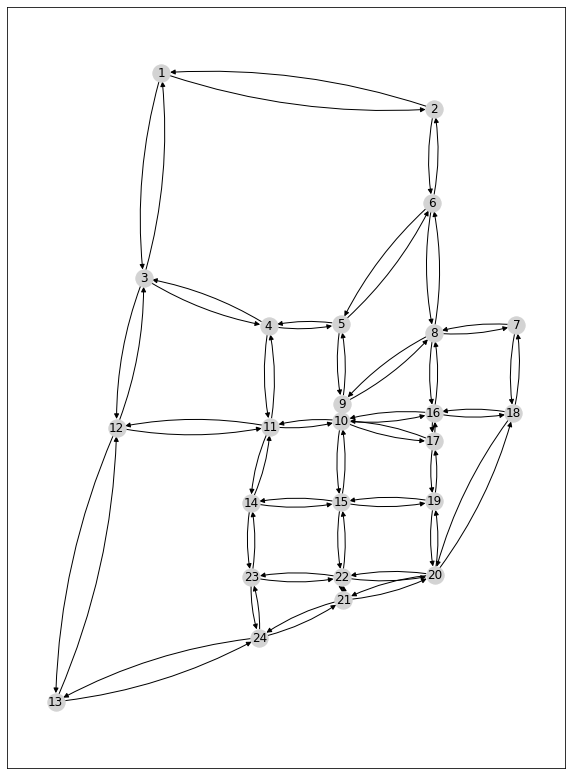

In [17]:
# Retrive position dict (label -> (x, y))
pos = sioux.get_node_pos()
edge_list = sioux.get_flow_df(1)

# Make nx.DiGraph from edgelist
G = nx.from_pandas_edgelist(
    edge_list,
    edge_attr=["flow"],
    create_using=nx.DiGraph(),
)

# Plot, nodes, edges and labels
plt.figure(figsize=(10, 14))
nx.draw_networkx_nodes(G, pos, node_color="lightgrey")
nx.draw_networkx_edges(
    G,
    pos, 
    width=edge_list.flow,#
    connectionstyle="arc3, rad=0.1",
)
_ = nx.draw_networkx_labels(G, pos)